### ***Submitted By: Kashish***
### ***BSCS-VIII Section "B"***
### ***CMS-ID: 023-22-0098***

In [1]:
from google.colab import files

uploaded = files.upload()

Saving siba_1pm.jpeg to siba_1pm.jpeg
Saving siba_5pm.jpeg to siba_5pm.jpeg


In [2]:
import cv2
import numpy as np
img_1pm = cv2.imread('siba_1pm.jpeg')
img_5pm = cv2.imread('siba_5pm.jpeg')

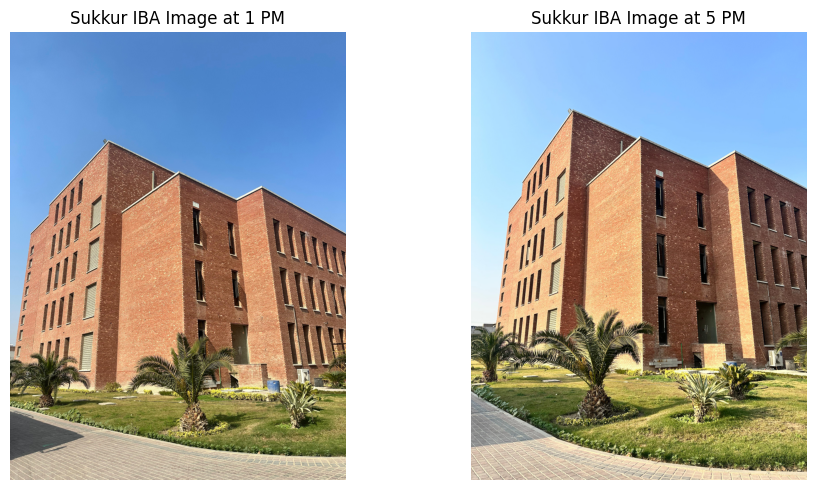

In [3]:
import matplotlib.pyplot as plt

# Convert BGR to RGB for correct color display
img1_rgb = cv2.cvtColor(img_1pm, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img_5pm, cv2.COLOR_BGR2RGB)

# Display images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title("Sukkur IBA Image at 1 PM")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.title("Sukkur IBA Image at 5 PM")
plt.axis("off")

plt.tight_layout()
plt.show()

In [4]:
img_1pm = cv2.resize(img_1pm, (300,300))
img_5pm = cv2.resize(img_5pm, (300,300))

# **Display the Pictures**

In [5]:
def euclidean_distance(img1, img2):
    return np.linalg.norm(img1.astype(float) - img2.astype(float))

# **Euclidean Distance in RGB Color Space**

In [6]:
rgb_dist = euclidean_distance(img_1pm, img_5pm)
print("RGB Distance:", rgb_dist)

RGB Distance: 40014.139251019755


# **Euclidean Distance in HSV Color Space**

In [7]:
hsv1 = cv2.cvtColor(img_1pm, cv2.COLOR_BGR2HSV)
hsv2 = cv2.cvtColor(img_5pm, cv2.COLOR_BGR2HSV)

hsv_dist = euclidean_distance(hsv1, hsv2)
print("HSV Distance:", hsv_dist)

HSV Distance: 31245.44061139161


# **Euclidean Distance in Lab Color Space**

In [8]:
lab1 = cv2.cvtColor(img_1pm, cv2.COLOR_BGR2LAB)
lab2 = cv2.cvtColor(img_5pm, cv2.COLOR_BGR2LAB)

lab_dist = euclidean_distance(lab1, lab2)
print("Lab Distance:", lab_dist)

Lab Distance: 23573.911470097617


# **Brightness-Normalized Comparison**

## **HSV Color Space**

In [9]:
def remove_v(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v[:] = 0
    return cv2.merge([h, s, v])

hsv1_nb = remove_v(img_1pm)
hsv2_nb = remove_v(img_5pm)

print("HSV Distance (Brightness Removed):", euclidean_distance(hsv1_nb, hsv2_nb))

HSV Distance (Brightness Removed): 19413.592918365215


## **Lab Color Space**

In [10]:
def remove_l(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l[:] = 0
    return cv2.merge([l, a, b])

lab1_nb = remove_l(img_1pm)
lab2_nb = remove_l(img_5pm)

print("Lab Distance (Brightness Removed):", euclidean_distance(lab1_nb, lab2_nb))

Lab Distance (Brightness Removed): 6268.839685300622


# **Observation:**
***The Euclidean distance between images captured at different times is high due to illumination changes. After removing brightness-related channels, the distance reduces significantly, indicating that most variation was caused by lighting rather than color information. Lab and HSV color spaces provide better illumination invariance compared to RGB.***